In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

## Step 1: Reading and Understanding the Data ##

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
# Read the given CSV file, and view some sample records

bikes_df = pd.read_csv("day.csv")
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspecting the data ####

In [4]:
bikes_df.shape

(730, 16)

In [5]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We have a total of 730 rows in the dataset and 16 columns. There are no missing values. Our target variable is cnt which is the count of total rental bikes including both casual and registered.

### Data Cleaning ###

Looking at a high level, the following variables can be removed: <br>
- instant: it is just a record index and we have default index.
- dteday: This is the date column, but we already have separate year and month variables. so dteday column is redundant and can be removed.
- casual and registered: These two columns can be ignored as our objective is to predict the total count of bikes and not category wise.

We will drop these 4 columns and save the new datagrame as bikes_df_mod.

In [6]:
bikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bikes_df_mod = bikes_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bikes_df_mod.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
bikes_df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
bikes_df_mod.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualizing the Data ##

We will use `seaborn` and `matplotlib` to visualize the data

- We will check which variables are most correlated with CNT.
- We will also find out if any multicollinearity esists.

#### Visualizing Numeric variables ####

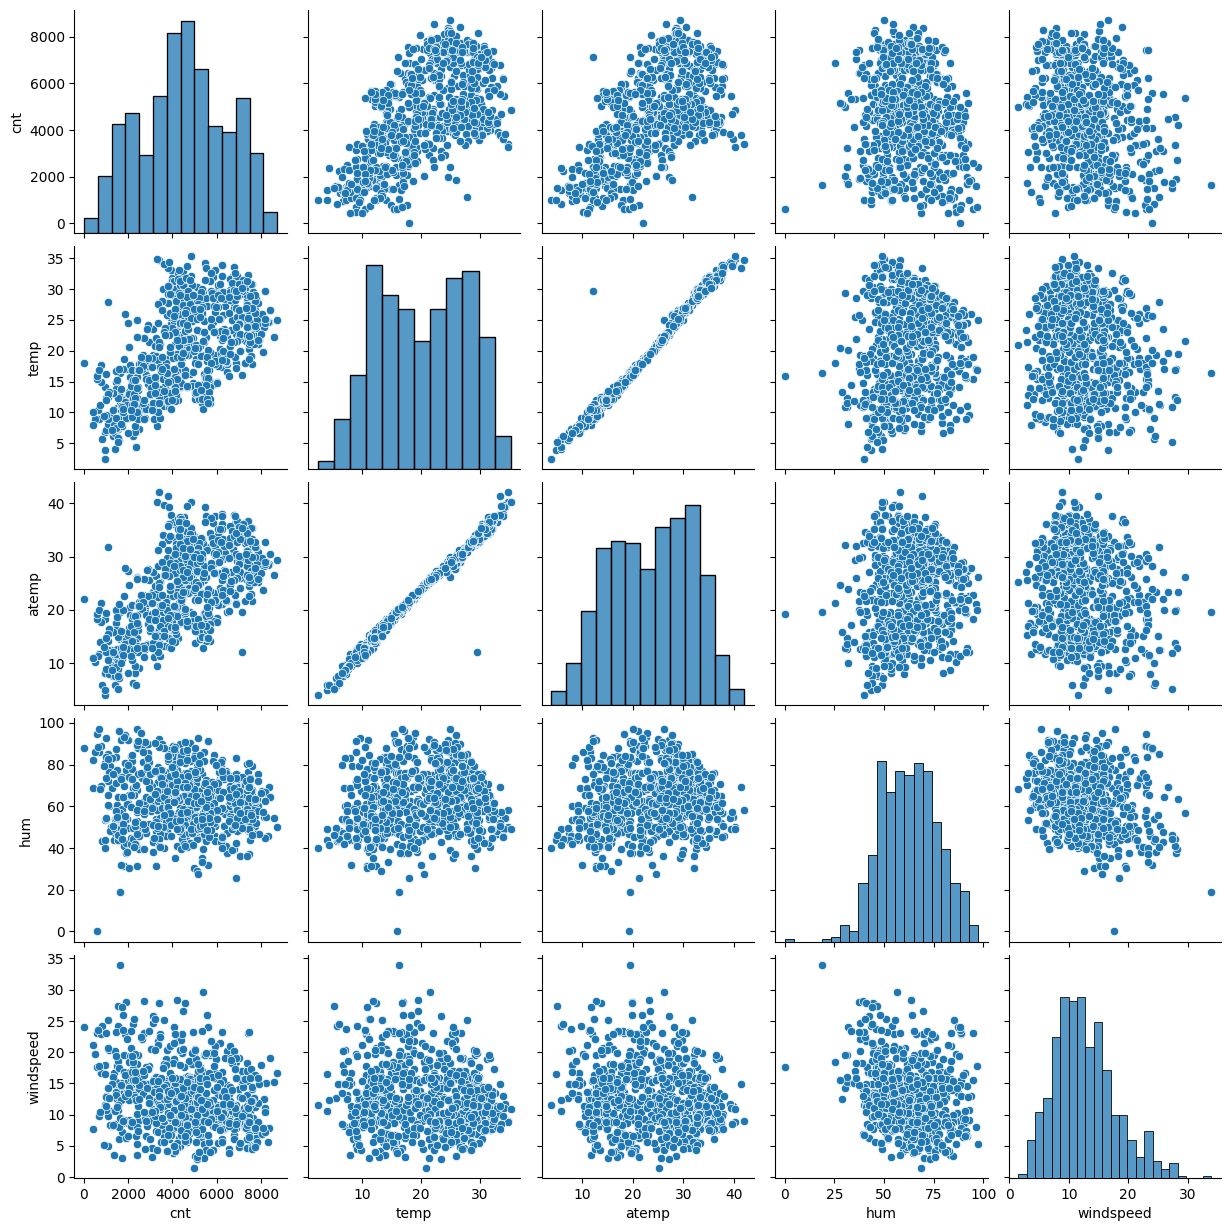

In [10]:
sns.pairplot(data=bikes_df_mod, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

From the above plots, we can see that temp and atemp are most strongly correlated with CNT. Also temp and atemp seem to be related with each other as well. Further we will look into the correlation between these variables.

#### Visualizing Categorical variables ####

In [11]:
#Mapping the categorical values to their respective categorical string values (reference data dictionary)

import calendar
bikes_df_mod['mnth'] = bikes_df_mod['mnth'].apply(lambda x: calendar.month_abbr[x])

# Maping seasons
bikes_df_mod.season = bikes_df_mod.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mapping weathersit
bikes_df_mod.weathersit = bikes_df_mod.weathersit.map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

#Mapping Weekday
bikes_df_mod.weekday = bikes_df_mod.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})


In [12]:
bikes_df_mod.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


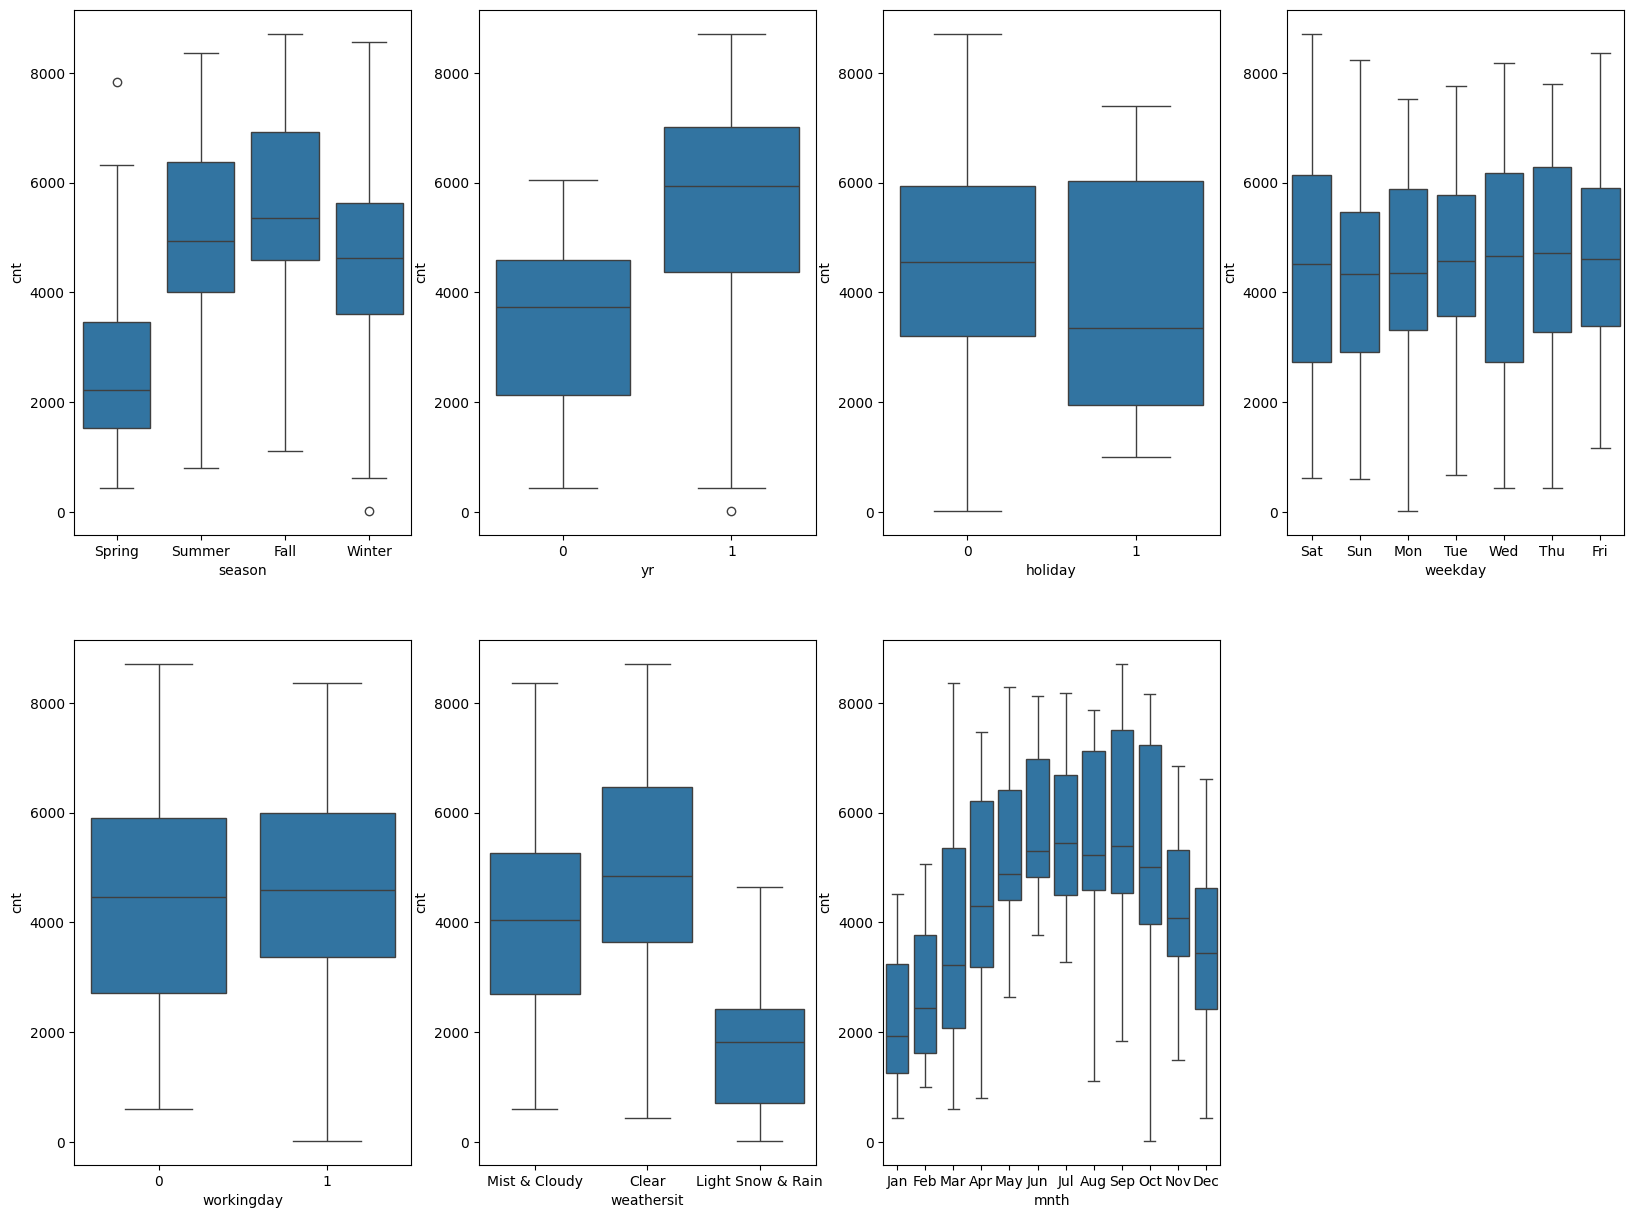

In [13]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_df_mod, patch_artist=True)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_df_mod)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_df_mod)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_df_mod)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_df_mod)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_df_mod)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_df_mod)
plt.show()

1. For the variable Season we can see that Fall has the highest median, which means the demand was high during this season. It is the lowest in 1: Spring.
2. The count of users is more in the year 2019 than 2018.
3. For the variable Holiday, the median is higher on the days when it is not a holiday.
4. The count of users is almost same throught the week as observed for the variable Weekday.
5. From WorkingDay we can see that the median is almost similar. So the count of users was not affected whether it was working day or not.
6. From the variable WeatherSit, we can see that there are no users for heavy rain. And the count is higher when the day is clear.

## Step 3: Data Preparation ##

#### Creating Dummy Variables ####

We will create dummy variables for the 4 categorical variables - `mnth`, `season`, `weekday`, `weathersit`.

In [14]:
#Getting dummy variables for above cateforical variables
dummy = bikes_df_mod[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy, drop_first=True, dtype=int)

# Adding the dummy variables to the original dataset
bikes_df_mod = pd.concat([dummy, bikes_df_mod], axis = 1)

#Deleting the orginal columns season.weathersit,weekday,mnth
bikes_df_mod.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)
bikes_df_mod.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
bikes_df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    int32  
 1   season_Summer                 730 non-null    int32  
 2   season_Winter                 730 non-null    int32  
 3   mnth_Aug                      730 non-null    int32  
 4   mnth_Dec                      730 non-null    int32  
 5   mnth_Feb                      730 non-null    int32  
 6   mnth_Jan                      730 non-null    int32  
 7   mnth_Jul                      730 non-null    int32  
 8   mnth_Jun                      730 non-null    int32  
 9   mnth_Mar                      730 non-null    int32  
 10  mnth_May                      730 non-null    int32  
 11  mnth_Nov                      730 non-null    int32  
 12  mnth_Oct                      730 non-null    int32  
 13  mnth_

## Step 4: Splitting the data into training and test sets ##

In [16]:
train, test = train_test_split(bikes_df_mod, train_size = 0.7, random_state = 100)
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


## Step 5: Rescaling the Features ##

Using MinMax scaling

In [17]:
#Instantiate an object
scaler = MinMaxScaler()

#Apply scaler to numerical variables(exclude the dummy variables)
num_vars = ['cnt','hum','windspeed','temp','atemp']
train[num_vars] = scaler.fit_transform(train[num_vars])

train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [18]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Preparing a heat map and look at the correlations between the variables ####

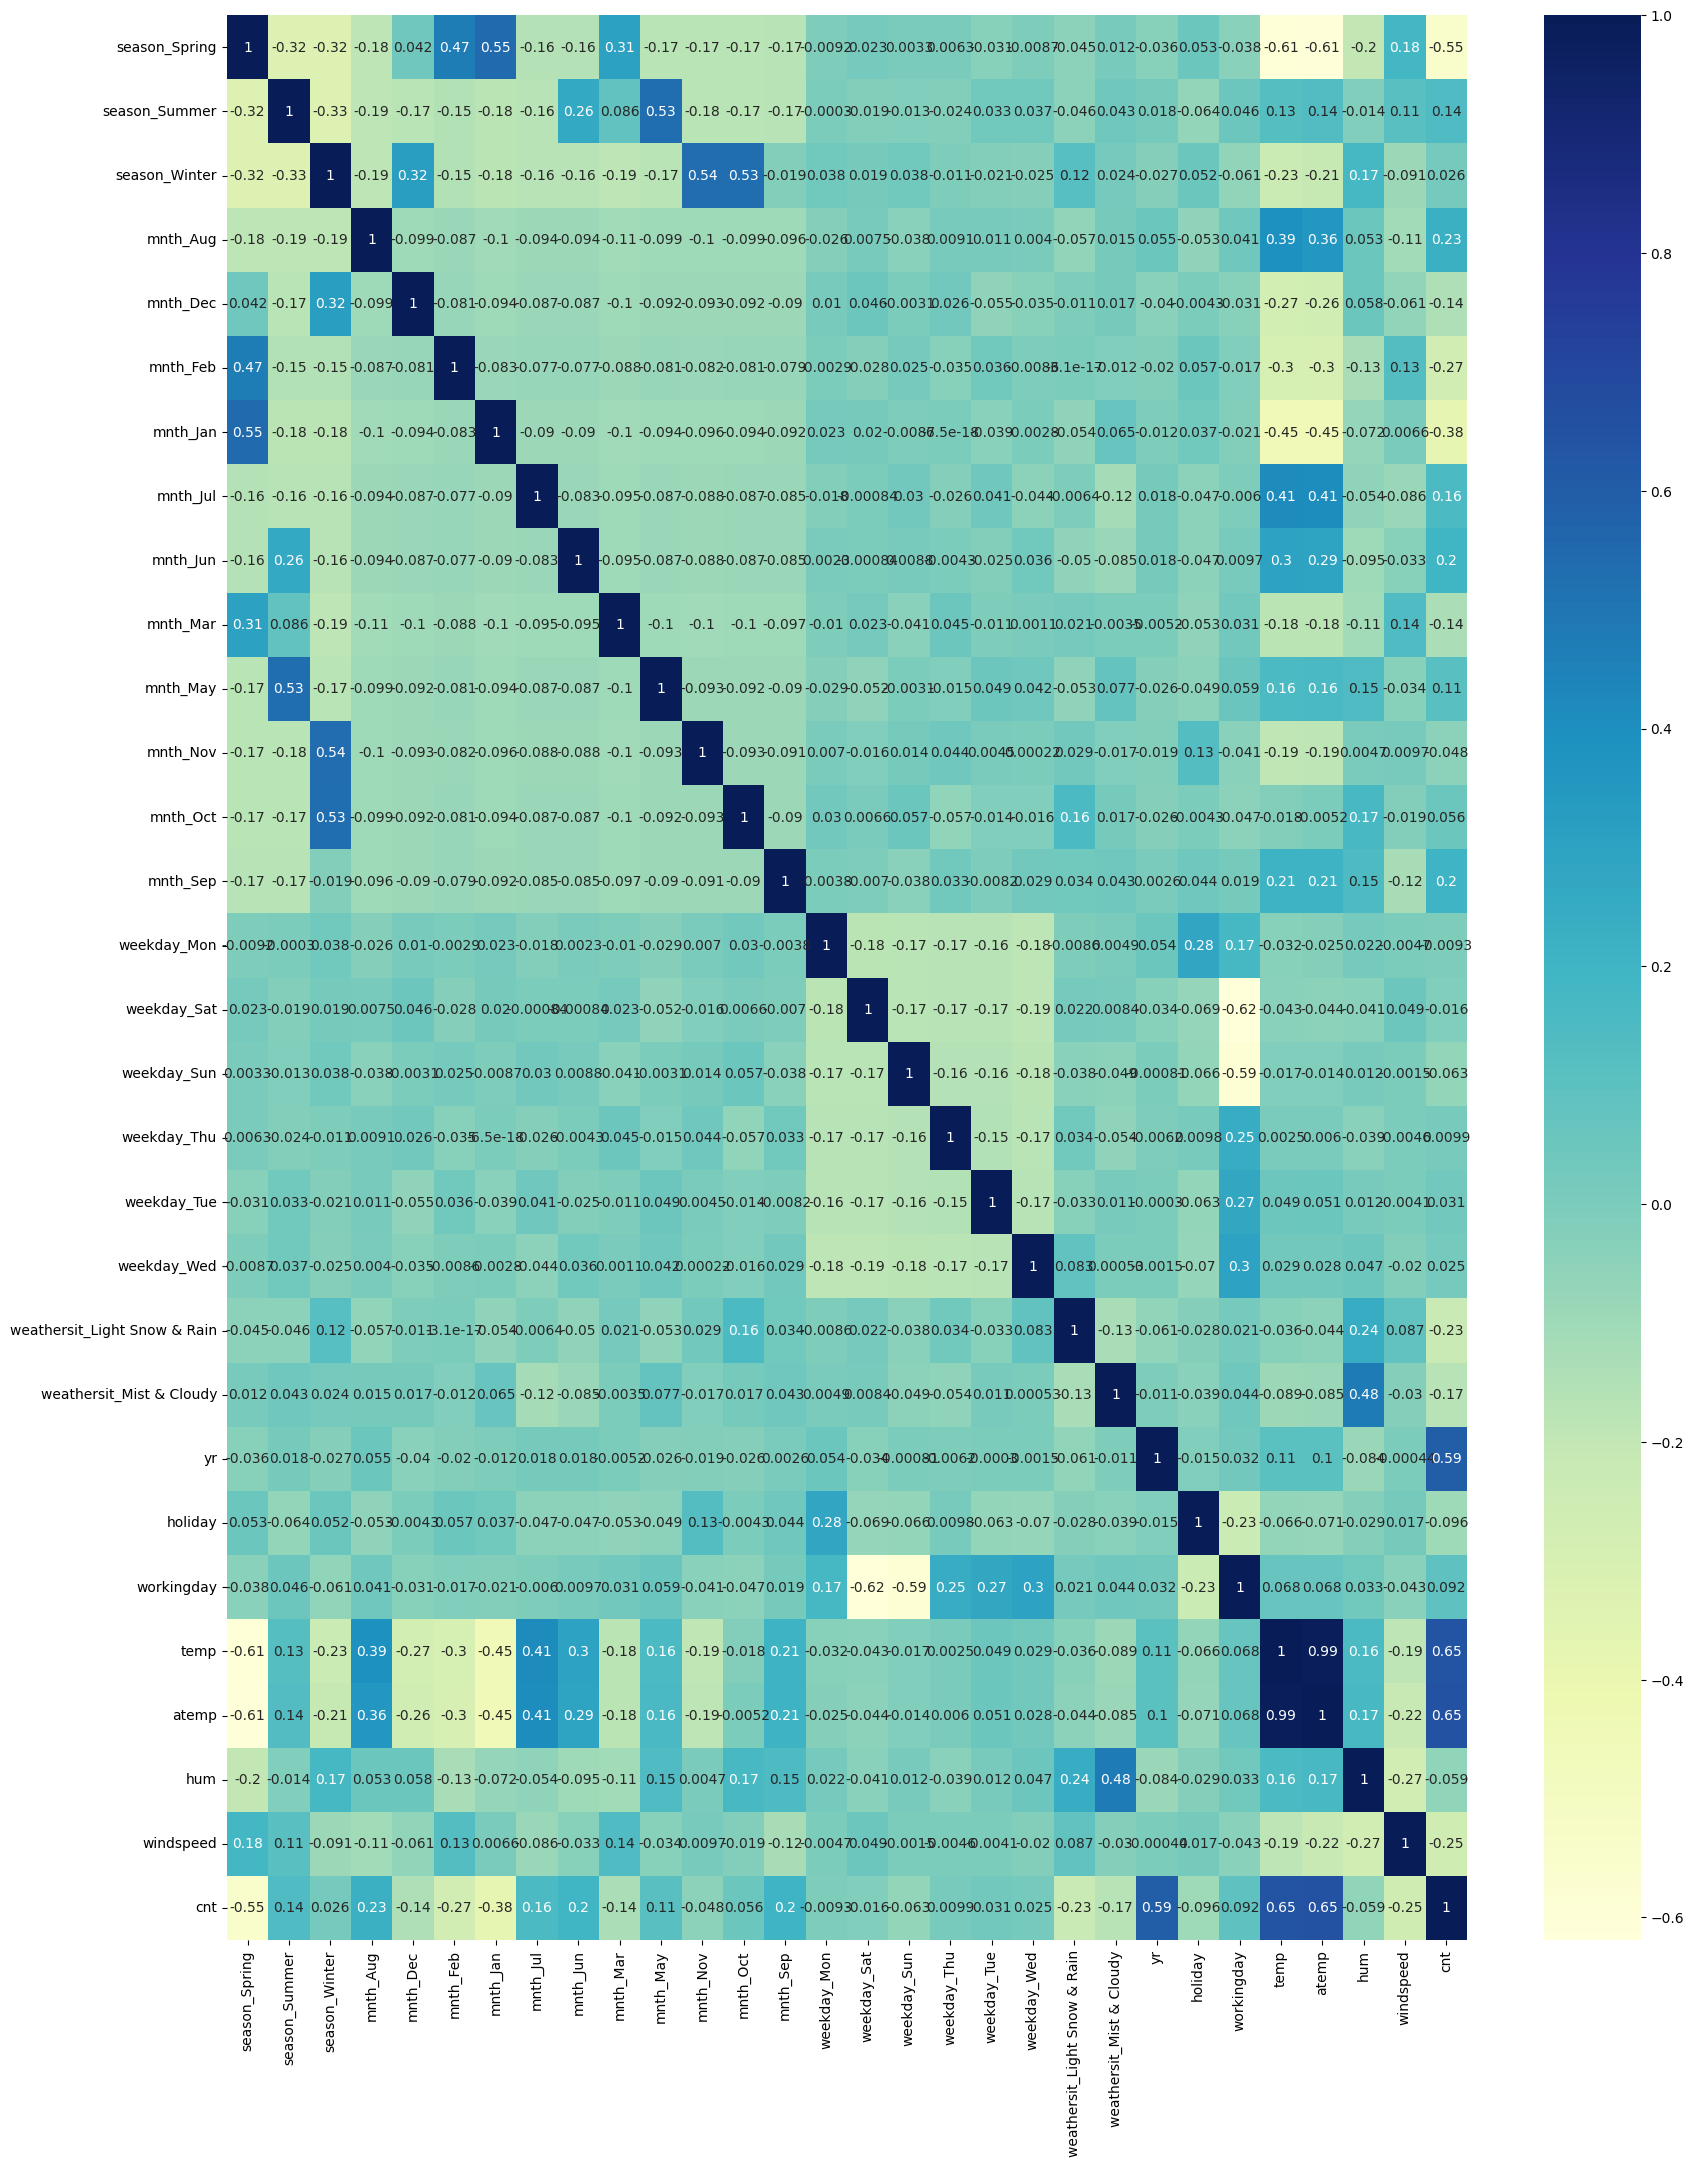

In [19]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Step 6: Building the Model ##


In [20]:
#preparing the variables for model building 
y_train = train.pop('cnt')
X_train = train

In [21]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [22]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


Here we are using RFE approach for feature selection and then we will use the `statsmodel` approach for building the model <br>

We start with 13 variables. <br>
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [23]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
# Running RFE with the output number of the variable equal to 13

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 13)
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 14),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [26]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [27]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday', 'atemp'],
      dtype='object')

In [28]:
# Creating X_train dataframe with RFE selected variables

X_train = X_train[col]

In [29]:
#adding a constant to X_train_rfe
X_train_sm = sm.add_constant(X_train)


In [30]:
X_train_sm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,temp,hum,windspeed
576,1.0,0,0,0,1,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,1,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,1,0,1,1,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,1,0,0,0.345824,0.751824,0.380981


### Model 1 ###

In [31]:
#create the first model
lm_1 = sm.OLS(y_train, X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.31e-189
Time:                        14:51:43   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2803      0.035      8.112      0.000       0.212       0.348
season_Spring                   -0.0564      0.021     -2.706      0.007      -0.097      -0.015
season_Summer                    0.0532      0.015      3.553      0.000       0.024       0.083
season_Winter                    0.0972      0.017      5.629      0.000       0.063       0.131
mnth_Jul                        -0.0576      0.018     -3.144      0.002      -0.094      -0.022
mnth_Sep                         0.0830      0.017      4.963      0.000       0.050       0.116
weekday_Sat                      0.0175      0.011      1.574      0.116      -0.004       0.039
weathersit_Light Snow & Rain    -0.2381      0.026     -9.037      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0532      0.010     -5.074      0.000      -0.074      -0.033
yr                               0.2298      0.008     28.287      0.000       0.214       0.246
holiday                         -0.0939      0.026     -3.668      0.000      -0.144      -0.044
temp                             0.5304      0.034     15.768      0.000       0.464       0.597
hum                             -0.1697      0.038     -4.494      0.000      -0.244      -0.096
windspeed                       -0.1834      0.026     -7.128      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       63.217   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.046
Skew:                          -0.687   Prob(JB):                     2.87e-30
Kurtosis:                       5.125   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can see that the p value for `weekday_Sat` is more than 0.05. Let's compute the VIF before dropping it. ####

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# Calculate the VIFs for the first model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [round(variance_inflation_factor(X_train.values, i), 2) for i in range(X_train.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,hum,28.03
10,temp,16.06
12,windspeed,4.67
0,season_Spring,4.03
2,season_Winter,3.35
1,season_Summer,2.79
7,weathersit_Mist & Cloudy,2.28
8,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.39


#### Now we want the VIF to be less than 5 ####

Lets first drop `weekday_Sat` and recompute the model

In [34]:
X_train = X_train.drop(['weekday_Sat'], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    int32  
 1   season_Summer                 510 non-null    int32  
 2   season_Winter                 510 non-null    int32  
 3   mnth_Jul                      510 non-null    int32  
 4   mnth_Sep                      510 non-null    int32  
 5   weathersit_Light Snow & Rain  510 non-null    int32  
 6   weathersit_Mist & Cloudy      510 non-null    int32  
 7   yr                            510 non-null    int64  
 8   holiday                       510 non-null    int64  
 9   temp                          510 non-null    float64
 10  hum                           510 non-null    float64
 11  windspeed                     510 non-null    float64
dtypes: float64(3), int32(7), int64(2)
memory usage: 37.9 KB


### Model 2 ###

In [35]:
#create the second model
X_train_sm = sm.add_constant(X_train)
lm_2 = sm.OLS(y_train, X_train_sm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          2.95e-190
Time:                        14:51:43   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2848      0.034      8.258      0.000       0.217       0.353
season_Spring                   -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_Summer                    0.0531      0.015      3.536      0.000       0.024       0.083
season_Winter                    0.0976      0.017      5.643      0.000       0.064       0.132
mnth_Jul                        -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_Sep                         0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_Mist & Cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
yr                               0.2294      0.008     28.208      0.000       0.213       0.245
holiday                         -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                             0.5299      0.034     15.728      0.000       0.464       0.596
hum                             -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                       -0.1822      0.026     -7.074      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### In the second model, we can see that the p value for all the variables is lesser than 0.05. Let's compute the VIF again. ####

In [36]:
# Calculate the VIFs for the second model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [round(variance_inflation_factor(X_train.values, i), 2) for i in range(X_train.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
10,hum,28.03
9,temp,16.03
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.33
1,season_Summer,2.79
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


The variable `hum` has the highest VIF so let's remove that and recompute the model.

In [37]:
X_train = X_train.drop(['hum'], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    int32  
 1   season_Summer                 510 non-null    int32  
 2   season_Winter                 510 non-null    int32  
 3   mnth_Jul                      510 non-null    int32  
 4   mnth_Sep                      510 non-null    int32  
 5   weathersit_Light Snow & Rain  510 non-null    int32  
 6   weathersit_Mist & Cloudy      510 non-null    int32  
 7   yr                            510 non-null    int64  
 8   holiday                       510 non-null    int64  
 9   temp                          510 non-null    float64
 10  windspeed                     510 non-null    float64
dtypes: float64(2), int32(7), int64(2)
memory usage: 33.9 KB


### Model 3 ###

In [38]:
#create the third model
X_train_sm = sm.add_constant(X_train)
lm_3 = sm.OLS(y_train, X_train_sm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          5.06e-187
Time:                        14:51:43   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1994      0.030      6.746      0.000       0.141       0.258
season_Spring                   -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_Summer                    0.0465      0.015      3.051      0.002       0.017       0.076
season_Winter                    0.0817      0.017      4.730      0.000       0.048       0.116
mnth_Jul                        -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_Sep                         0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Mist & Cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
yr                               0.2336      0.008     28.352      0.000       0.217       0.250
holiday                         -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                             0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                       -0.1479      0.025     -5.887      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### In the third model, we can see that the p value for all the variables are less than 0.05 let's compute the VIF again. ####

In [39]:
# Calculate the VIFs for the third model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [round(variance_inflation_factor(X_train.values, i), 2) for i in range(X_train.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.23
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.78
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


Now as we can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise Model 3.

## Step 7: Residual Analysis of the train data ##

Let us plot the histogram of the error terms and see what it looks like.

In [40]:
y_train_pred = lm_3.predict(X_train_sm)
y_train_pred.head()

576    0.742032
426    0.465108
728    0.388090
482    0.565713
111    0.279196
dtype: float64

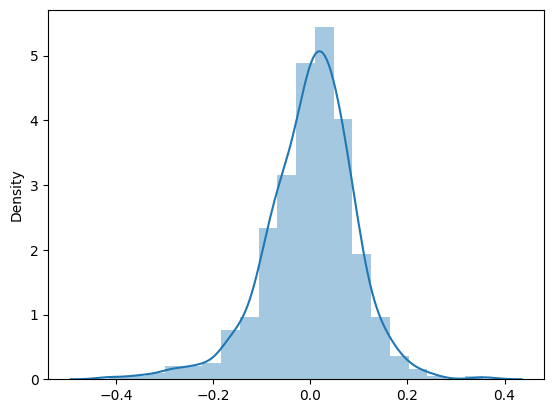

In [41]:
#Plot the histogram for the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.show()

The distribution is centered around 0 and is approximately normal.

#### Plotting a qq-plot for the same ####

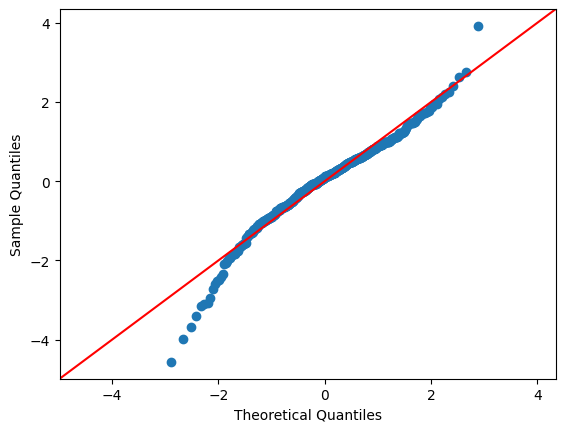

In [42]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

We see that most of the data points lie on the straight line.

## Step 8: Making Predictions on the test data ##

#### Apply the scaling on test data set ####

In [43]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [44]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


Dividing into X_test and y_test

In [45]:
y_test = test.pop('cnt')
X_test = test

#### Making predictions using the final model ####

In [46]:
X_test = sm.add_constant(X_test[X_train.columns])
y_test_pred = lm_3.predict(X_test)

In [47]:
y_test_pred.head()

184    0.365685
535    0.899306
299    0.402941
221    0.582072
152    0.567685
dtype: float64

#### Calculating R-Squared ####

In [48]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.835281973840364
r2_score of test dataset 0.8052680349048552


The r-squared score for train and test data is close.

## Step 9: Model Evaluation ##

Plotting the graph for actual versus predicted values.


Text(0, 0.5, 'y_pred')

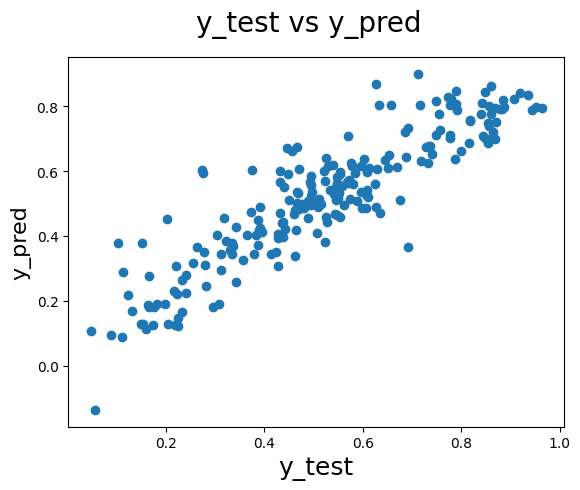

In [49]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### Getting the variable names and the coefficient values for the final equation ####

In [50]:
param = pd.DataFrame(lm_3.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
10,temp,0.490988
8,yr,0.233570
0,const,0.199434
3,season_Winter,0.081741
5,mnth_Sep,0.076846
2,season_Summer,0.046487
4,mnth_Jul,-0.052057
1,season_Spring,-0.067169
7,weathersit_Mist & Cloudy,-0.080167


## Final Conclusion ##

**All the positive coefficients like temp, season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.** <br><br>

- From R-Squared and adj R-Squared value of both train and testdataset we could conclde the above variables can well explain more than 80% of the bike demand.
- Based on the final model, top three features contributing significantly towards explaining the demand are:
- Temprature (0.490988)
- weathersit_Light Snow & Rain (-0.284199)
- Year (0.233570)

The compamy can focus on below points

- Increase in temprature also increases the demand of bikes, so it should keep track of temprature.
- Demand is higher in winter season, so it should be prepared to meet the demands
- Holiday season seems to be least interesting for biking.